In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("/content/StudentPerformanceFactors.csv")

In [4]:
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (6607, 20)
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Q

In [5]:
print("\nBasic descriptive statistics:")
print(df.describe(include='all'))


Basic descriptive statistics:
        Hours_Studied   Attendance Parental_Involvement Access_to_Resources  \
count     6607.000000  6607.000000                 6607                6607   
unique            NaN          NaN                    3                   3   
top               NaN          NaN               Medium              Medium   
freq              NaN          NaN                 3362                3319   
mean        19.975329    79.977448                  NaN                 NaN   
std          5.990594    11.547475                  NaN                 NaN   
min          1.000000    60.000000                  NaN                 NaN   
25%         16.000000    70.000000                  NaN                 NaN   
50%         20.000000    80.000000                  NaN                 NaN   
75%         24.000000    90.000000                  NaN                 NaN   
max         44.000000   100.000000                  NaN                 NaN   

       Extracurricul

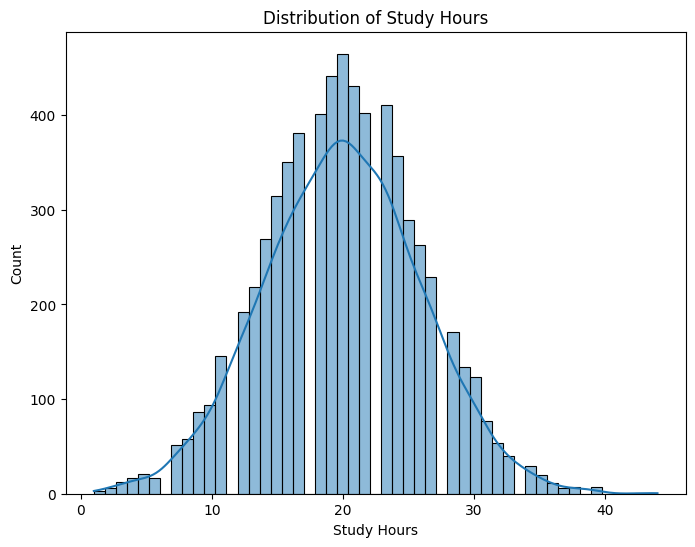

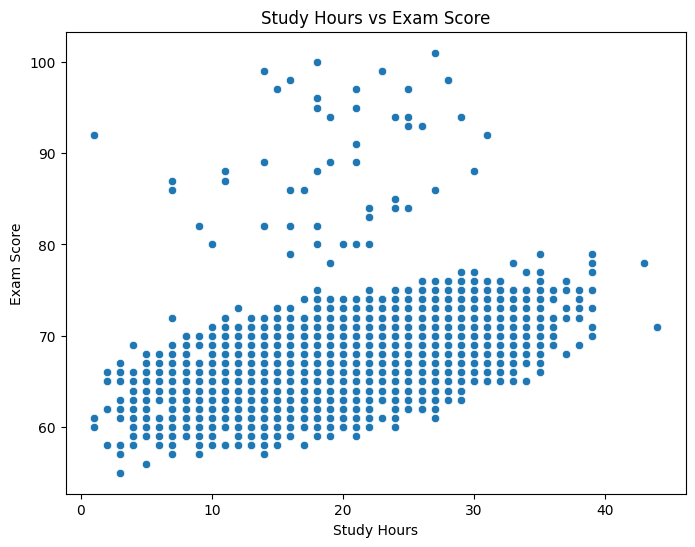

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Hours_Studied'], kde=True)
plt.title("Distribution of Study Hours")
plt.xlabel("Study Hours")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title("Study Hours vs Exam Score")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

In [9]:
X = df[['Hours_Studied']].copy()
y = df['Exam_Score']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel Coefficient (slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)


Model Coefficient (slope): 0.285668744443087
Model Intercept: 61.51116746904424


In [12]:
y_pred = model.predict(X_test)

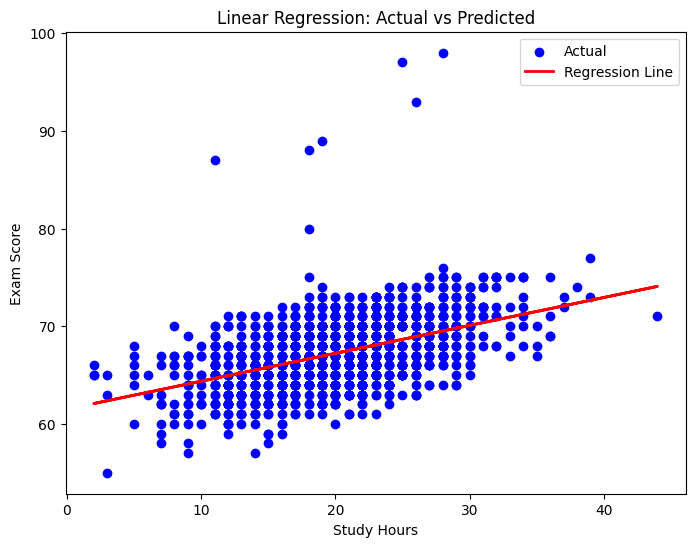

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

In [14]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Model Performance:
Mean Squared Error (MSE): 10.85592128879332
R² Score: 0.2319868674542106


In [15]:
print(df.columns)


Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')
